In [47]:
import numpy as np
from tqdm.auto import tqdm
from scipy import ndimage
from skimage.measure import regionprops, label
from src.distance_measures import analyse_video, analyse_image
from src.gaussian_noise import generate_noise
from src.preprocessing import process_image, process_video
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import label2rgb
# from skimage.segmentation import label, regionprops

In [48]:
def mean_size(image):
    _, counts = np.unique(label(image), return_counts=True)
    return np.mean(counts[1:])

In [49]:
def find_default_params(image):
    alpha_range = np.arange(0, 1, .1)
    tau_range = np.arange(-1, 1, .1)

    average = mean_size(image)

    best = -999
    alpha, tau = None, None

    for a in alpha_range:
        for t in tau_range:
            noise = generate_noise(size=image.shape[0], threshold=t, disk_size=a, amount=1)[0]
            curr = mean_size(noise)
            if abs(average - curr) < abs(average - best):
                best = curr
                alpha, tau = a, t
    return alpha, tau


In [50]:
# %%time
im = process_video('images/cheese_gel.avi', threshold=0.3, skip_size=239, size=400)[1]
a, t = find_default_params(im)
a, t

(0.7000000000000001, 0.09999999999999964)

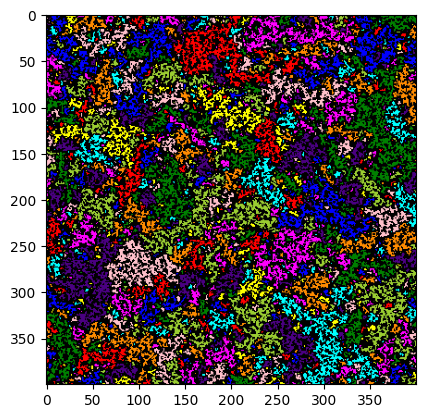

average size:  28.52974878801234


In [51]:
noise = generate_noise(size=400, threshold=t, disk_size=a)[0]
plt.imshow(label2rgb(noise))
plt.show()
print('average size: ', mean_size(noise))

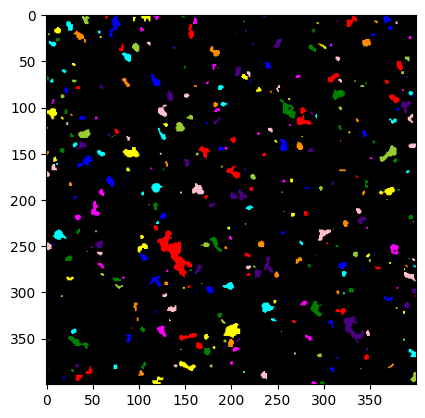

average size:  27.450666666666667


In [52]:
plt.imshow(label2rgb(im))
plt.show()
print('average size: ', mean_size(im))